In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
#import pygame

def create_database(x,y,p):   #x ist die Höhe der Fläche, y die Länge und p die Wahrscheinlichkeit, dass eine Zelle ein Baum ist 
    return np.random.choice([0,1],size=(x,y),p=[1-p,p])

p=np.random.randint(0,101)/100

data = create_database(5,5,0.8)
data



array([[1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1]])

0

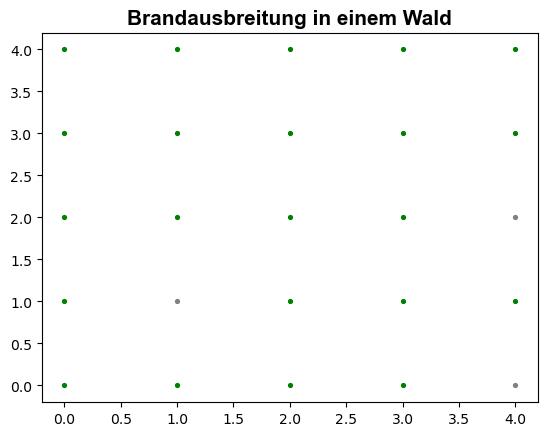

In [2]:


def waldanzeige(x,y,wald):
    x1,y1 = np.where(wald==1)# Baum x 
    x2,y2 = np.where(wald==0) # Leer x
    x3,y3 = np.where(wald==2) # Feuer x  
    plt.title("Brandausbreitung in einem Wald",fontweight="bold",fontname="Arial",fontsize="15")
    plt.scatter(x1,y1,c='green',marker='.',s=30) # Baum
    plt.scatter(x2,y2,c='grey',marker='.',s=30)#Leer
    plt.scatter(x3,y3,c='red',marker='.',s=30)#Feuer
    return 0

#data[5][5]=1

waldanzeige(100,100,data)


In [3]:
def init_feuerausbreitung(wald): 
    if(len(np.unique(wald))==2):
        x,y=np.where(wald==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        wald[i_x][i_y]=2
    elif(np.unique(wald)==[1]).any():
        x,y=np.where(wald==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        wald[i_x][i_y]=2        
    return wald

init_feuerausbreitung(data)




array([[1, 1, 1, 2, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 0, 1, 1]])

In [4]:
def feuerausbreitung(wald,proba): #wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
    proba=proba*100
    prop_abr_brul=[]
    if(len(np.where(wald==2)[0])==0):
        init_feuerausbreitung(wald)
    x,y = np.where(wald==2)
    zh_baum_inital = len(np.where(wald==1)[0])
    for i in range(len(x)):
        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0):
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0
            zh_baum = len(np.where(wald==1)[0])
            prop=zh_baum/zh_baum_inital
            prop_abr_brul.append(prop)
        else:
            wald[x[i]][y[i]]=0
            
    if(len(np.where(wald==2)[0])==0):
        #zh_baum = len(np.where(wald==3)[0])+len(np.where(wald==1)[0])
        zh_baum = len(np.where(wald==1)[0])
        print("Anzhl der Baum = ",zh_baum,"\n Anteil des verbrannten Baumes als Funktion der Zeit: ",prop_abr_brul)
        #zh_baum_brenn = len(np.where(wald==3)[0])
        #print("Total Anzhl der Baum : ",zh_baum,"\nZhle Baum brenn : ",zh_baum_brenn,"\n Proportion zh_baum_brule/zh_baum : ",(zh_baum_brenn/zh_baum)*100,"%")
        return 0

feuerausbreitung(data,0.2)

Anzhl der Baum =  21 
 Anteil des verbrannten Baumes als Funktion der Zeit:  []


0

Anzhl der Baum =  276 
 Anteil des verbrannten Baumes als Funktion der Zeit:  [1.0]
Baumprozentsatz :  50.0000000000000 %


0

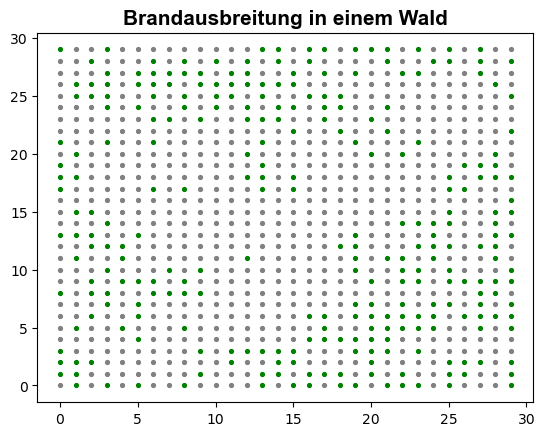

In [13]:
#Die Simulation fur die erste Implentatierung
#x,y: Die grosse der Fläche, b die Warcheinlichkeit, dass ein Baum auf eine Zelle gibt, blitz: die Warcheinlichkeit, dass ein blitz gibt
def start(x,y,b, blitz):  
    wald = create_database(x,y,b)
    print("Baumprozentsatz : ",b*100,"%", "Feuer Ausbreitung proba = 0.8")
    init_feuerausbreitung(wald)
    waldanzeige(x,y,wald)
    while feuerausbreitung(wald,proba=0.8)!=0:
        pb=np.random.randint(0,101)
        if(blitz*100>pb):
            init_feuerausbreitung(wald)
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)
        else:
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)

    print("Baumprozentsatz : ",b*100,"%")
    return waldanzeige(x,y,wald)




start(30,30,0.5,0.7)  

In [6]:
#Die zweite feuerausbreitung implementierung
def feuerausbreitung2(wald,proba): #wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
    proba=proba*100
    prop_abr_brul=[]
    if(len(np.where(wald==2)[0])==0):
        init_feuerausbreitung(wald)
    x,y = np.where(wald==2)
    zh_baum_inital = len(np.where(wald==1)[0])
    for i in range(len(x)):
        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #Die innere der Fläche
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]==len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #Rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba: #Rechts
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]>0) and (y[i] > 0): #Oben
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba: #Hoch
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]==0) and (y[i] > 0): #Links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] == 0): #Unten
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]==0) and (y[i] == 0): #Unten/links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0
            
        if (x[i]==len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]>0) and (y[i]>0): #Oben/rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba: #Recht
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba: #Hoch
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]==len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i]==0): #Unten/rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba: #Recht
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba: #Hoch
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0
        

        if (x[i]<len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]==0) and (y[i]>0): #Oben/links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba: #Recht
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba: #Hoch                    
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

            zh_baum = len(np.where(wald==1)[0])
            prop=zh_baum/zh_baum_inital
            prop_abr_brul.append(prop)
        else:
            wald[x[i]][y[i]]=0
            
    if(len(np.where(wald==2)[0])==0):
        #zh_baum = len(np.where(wald==3)[0])+len(np.where(wald==1)[0])
        zh_baum = len(np.where(wald==1)[0])
        print("Anzhl der Baum = ",zh_baum,"\n Anteil des verbrannten Baumes als Funktion der Zeit: ",prop_abr_brul)
        #zh_baum_brenn = len(np.where(wald==3)[0])
        #print("Total Anzhl der Baum : ",zh_baum,"\nZhle Baum brenn : ",zh_baum_brenn,"\n Proportion zh_baum_brule/zh_baum : ",(zh_baum_brenn/zh_baum)*100,"%")
        return 0

Anzhl der Baum =  230 
 Anteil des verbrannten Baumes als Funktion der Zeit:  [1.0, 1.0]


0

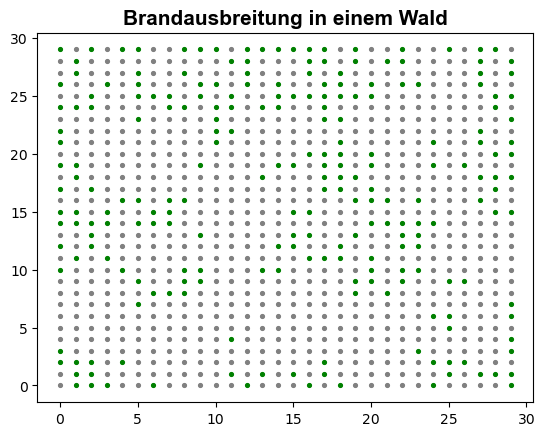

In [12]:
def start2(x,y,b, blitz):
    wald = create_database(x,y,b)
    print("lx=",len(wald),"ly=",len(wald[0]))
    print("Baumprozentsatz : ",b*100,"%")
    init_feuerausbreitung(wald)
    waldanzeige(x,y,wald)
    while feuerausbreitung(wald,proba=0.8)!=0:
        pb=np.random.randint(0,101)
        if(blitz*100>pb):
            init_feuerausbreitung(wald)
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)
        else:
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)
    #print("Baumprozentsatz : ",p*100,"%")
    #init_feuerausbreitung(wald)
    #waldanzeige(x,y,wald)
    #wald[0][14]=2
    
    
    return waldanzeige(x,y,wald)

start2(30,30,0.5,0.7)

In [8]:
#wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
#richtung ist die Richtung der Wind und gwdk sein Geschwindigkeit zwischen 0 bis 3 (O: kein Wind, 1:klein, 2:mittel, 3:hoch)
def feuerausbreitung2_mit_Wind(wald,proba,richtung, gwdk): #wald ist die Fläche und proba ist die Warhscheinlikeit, dass ein Baum, der neben ein Feuer steht in der nächste Zeitschritten brennt
    proba=proba*100
    prop_abr_brul=[]
    restproba=(100-proba)/3 
    wn=0
    ws=0
    wo=0
    ww=0

    if(richtung=="N"):#Nord
        wn=gwdk*restproba
    
    if(richtung=="S"):#SUD
        ws=gwdk*restproba

    if(richtung=="O"):#OST
        wo=gwdk*restproba

    if(richtung=="W"):#WEST
        ww=gwdk*restproba
    
    if(len(np.where(wald==2)[0])==0):
        init_feuerausbreitung(wald)
    x,y = np.where(wald==2)
    zh_baum_inital = len(np.where(wald==1)[0])
    for i in range(len(x)):
        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #Innere der Fläche
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]==len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] > 0): #Rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]>0) and (y[i] > 0): #Oben
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba+wn: #Oben
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]==0) and (y[i] > 0): #Links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i] == 0): #Unten
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]<len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]==0) and (y[i] == 0): #Unten/links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0
            
        if (x[i]==len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]>0) and (y[i]>0): #Oben/rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba+wn: #Oben
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

        if (x[i]==len(wald)-1) and (y[i]<len(wald[0])-1) and (x[i]>0) and (y[i]==0): #Unten/rechts
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[0][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[0][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[x[i]-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[x[i]-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]+1]==1 and rand<=proba+wn: #Oben
                wald[x[i]][y[i]+1]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][len(wald[0])-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][len(wald[0])-1]=2
            wald[x[i]][y[i]]=0
        

        if (x[i]<len(wald)-1) and (y[i]==len(wald[0]-1)) and (x[i]==0) and (y[i]>0): #Oben/links
            #print("x=",x[i],"   y=",y[i],"\n")
            rand=np.random.randint(0,101)
            if wald[x[i]+1][y[i]]==1 and rand<=proba+wo: #Rechts
                wald[x[i]+1][y[i]]=2 
            rand=np.random.randint(0,101)
            if wald[len(wald)-1][y[i]]==1 and rand<=proba+ww: #Links
                wald[len(wald)-1][y[i]]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][0]==1 and rand<=proba+ww: #Oben                    
                wald[x[i]][0]=2
            rand=np.random.randint(0,101)
            if wald[x[i]][y[i]-1]==1 and rand<=proba+ws: #Unter
                wald[x[i]][y[i]-1]=2
            wald[x[i]][y[i]]=0

            zh_baum = len(np.where(wald==1)[0])
            prop=zh_baum/zh_baum_inital
            prop_abr_brul.append(prop)
        else:
            wald[x[i]][y[i]]=0
            
    if(len(np.where(wald==2)[0])==0):
        #zh_baum = len(np.where(wald==3)[0])+len(np.where(wald==1)[0])
        zh_baum = len(np.where(wald==1)[0])
        print("Anzhl der Baum = ",zh_baum,"\n Anteil des verbrannten Baumes als Funktion der Zeit: ",prop_abr_brul)
        #zh_baum_brenn = len(np.where(wald==3)[0])
        #print("Total Anzhl der Baum : ",zh_baum,"\nZhle Baum brenn : ",zh_baum_brenn,"\n Proportion zh_baum_brule/zh_baum : ",(zh_baum_brenn/zh_baum)*100,"%")
        return 0

Anzhl der Baum =  135 
 Anteil des verbrannten Baumes als Funktion der Zeit:  []


0

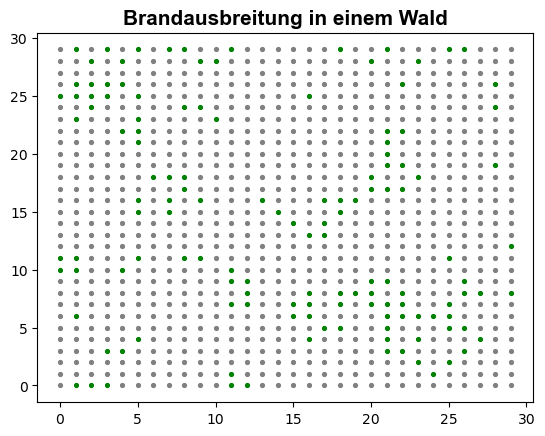

In [9]:
def start_wind(x,y,b, blitz):
    wald = create_database(x,y,b)
    wind_richt="N"
    print("lx=",len(wald),"ly=",len(wald[0]))
    print("Baumprozentsatz : ",b*100,"%")
    init_feuerausbreitung(wald)
    waldanzeige(x,y,wald)
    while feuerausbreitung2_mit_Wind(wald, proba=0.8, richtung="O", gwdk=3)!=0:
        pb=np.random.randint(0,101)
        if(blitz*100>pb):
            init_feuerausbreitung(wald)
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)
        else:
            waldanzeige(x,y,wald)
            plt.pause(0.5)
            display.clear_output(wait=True)
    
    return waldanzeige(x,y,wald)

start_wind(30,30,0.5,0.7)